### Income Prediction Machine Learning Project

In [76]:
!pip install scikit-learn

In [77]:
import pandas as pd

In [78]:
df = pd.read_csv("income.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [79]:
df= pd.concat([df.drop("occupation",axis=1),pd.get_dummies(df.occupation).astype(int).add_prefix("occupation_")],axis=1)
df= pd.concat([df.drop("workclass",axis=1),pd.get_dummies(df.workclass).astype(int).add_prefix("workclass_")],axis=1)
df= df.drop("education",axis=1)
df= pd.concat([df.drop("marital-status",axis=1),pd.get_dummies(df["marital-status"]).astype(int).add_prefix("marital-status_")],axis=1)
df= pd.concat([df.drop("relationship",axis=1),pd.get_dummies(df.relationship).astype(int).add_prefix("relationship_")],axis=1)
df= pd.concat([df.drop("race",axis=1),pd.get_dummies(df.race).astype(int).add_prefix("race_")],axis=1)
df= pd.concat([df.drop("native-country",axis=1),pd.get_dummies(df["native-country"]).astype(int).add_prefix("native-country_")],axis=1)
df["gender"] = df["gender"].apply(lambda x: 1 if x =="Male" else 0)
df["income"] = df["income"].apply(lambda x: 1 if x ==">50K" else 0)

In [80]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

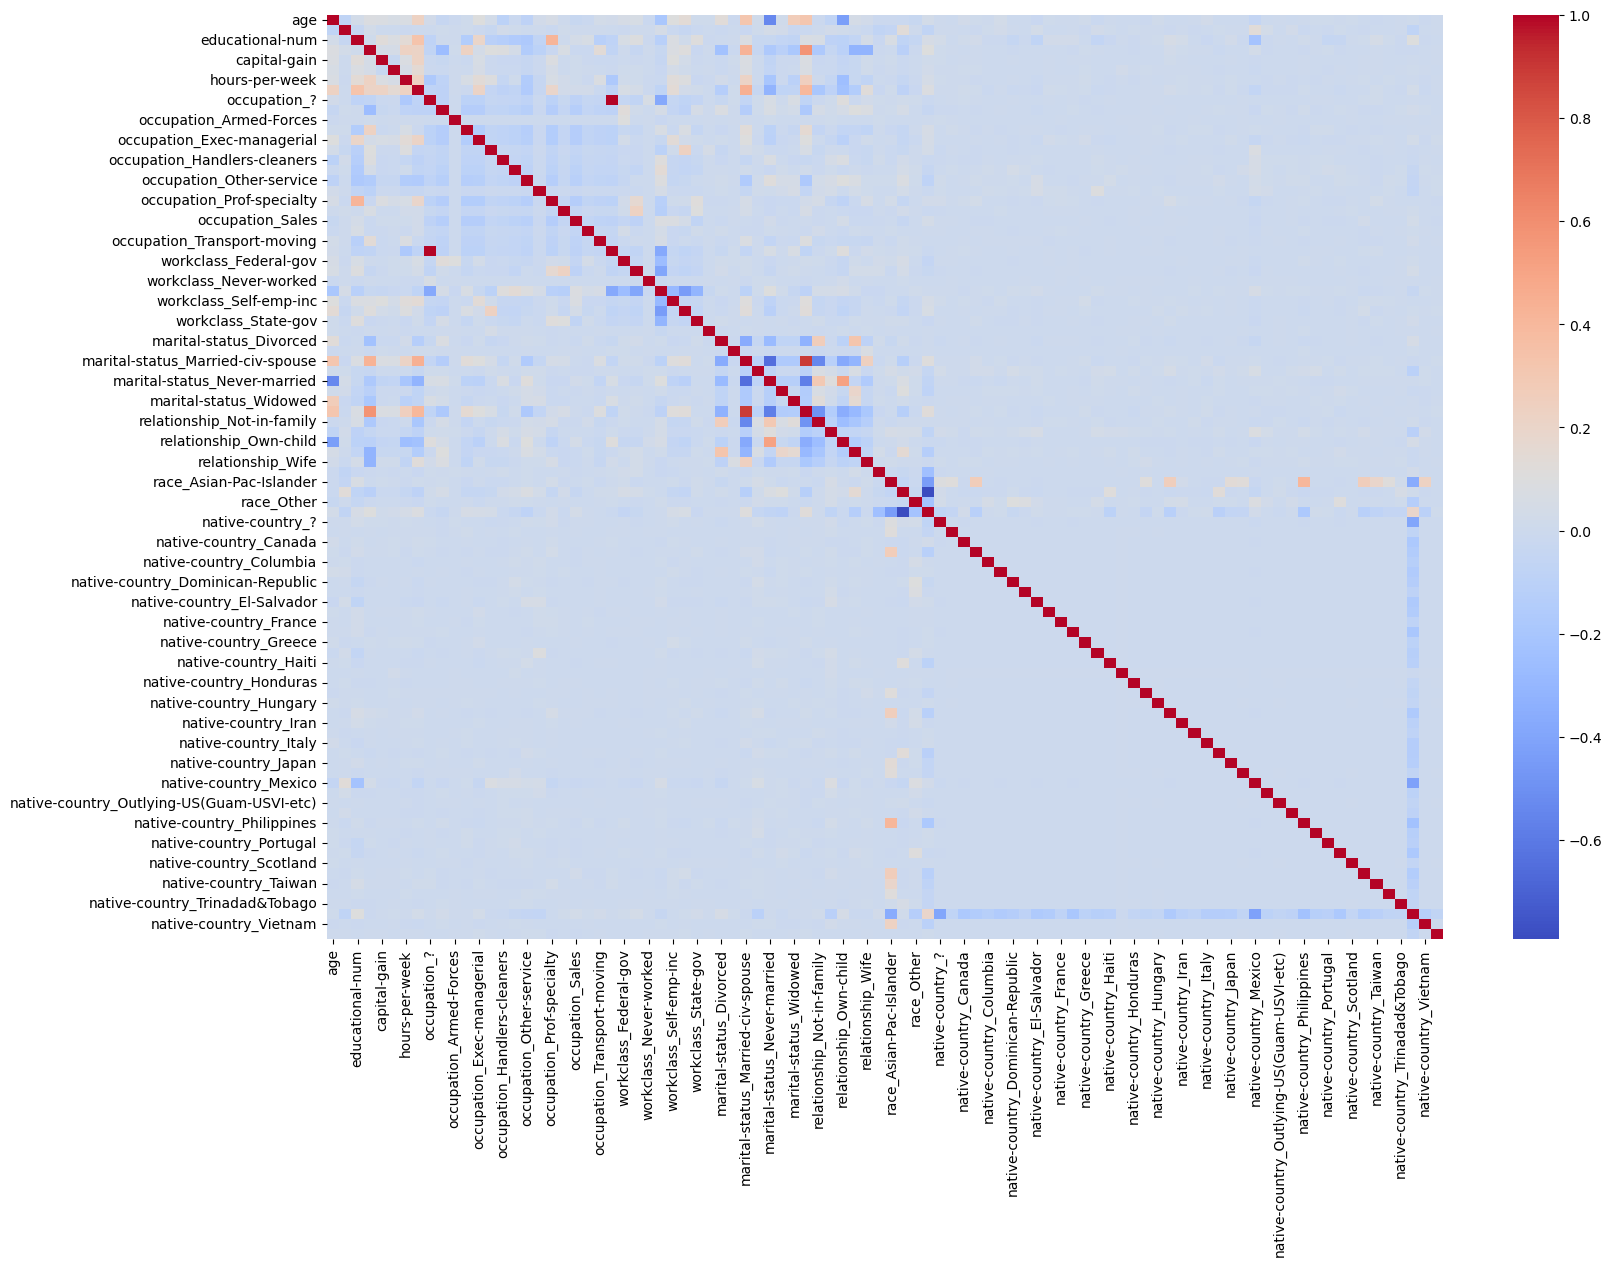

In [82]:
plt.figure(figsize =(18,12))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")

In [83]:
correlations = df.corr()["income"].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<Axes: >

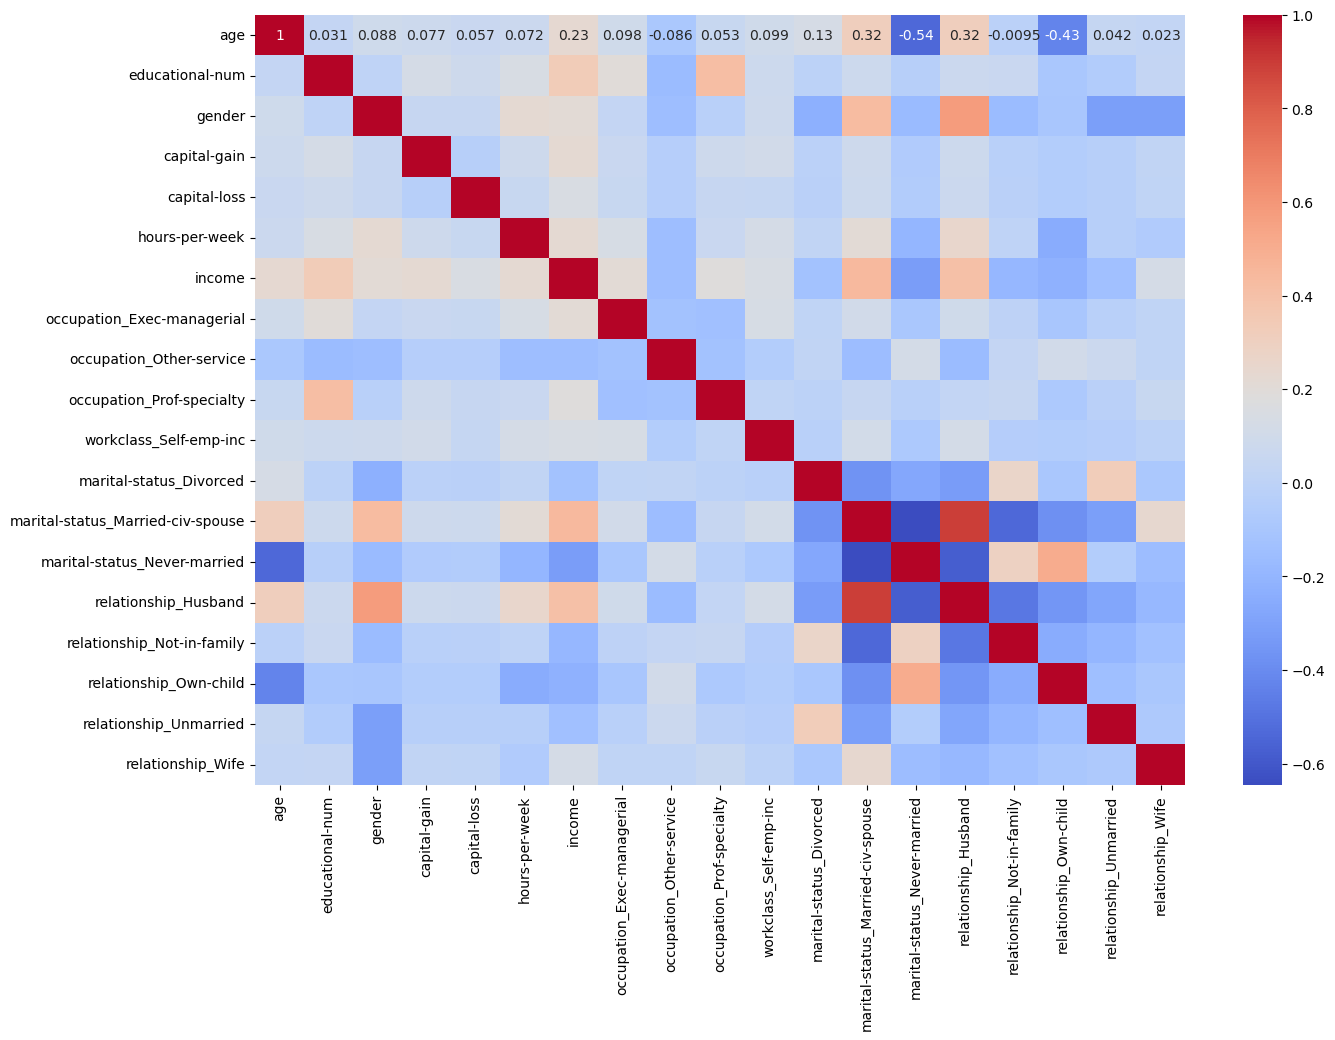

In [84]:
plt.figure(figsize =(15,10))
sns.heatmap(df_dropped.corr(), annot=True, cmap="coolwarm")

#### Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = df.drop("fnlwgt",axis=1)

train_df, test_df = train_test_split(df,test_size=0.2)

In [87]:
train_X = train_df.drop ("income",axis=1)
train_Y = train_df["income"]

test_X = test_df.drop("income",axis=1)
test_Y = test_df["income"]

In [88]:
forest = RandomForestClassifier()

forest.fit(train_X, train_Y)

RandomForestClassifier()

In [89]:
forest.score(test_X,test_Y)

0.8488074521445389

In [90]:
forest.feature_importances_

array([2.26967422e-01, 1.30475139e-01, 1.40305586e-02, 1.09029268e-01,
       3.65947033e-02, 1.12231787e-01, 1.69585691e-03, 4.80909985e-03,
       7.35956160e-05, 5.89405741e-03, 2.31216301e-02, 4.52871048e-03,
       3.25686500e-03, 3.80048461e-03, 8.34197280e-03, 2.41389392e-04,
       1.75540116e-02, 2.84402742e-03, 6.28124697e-03, 4.48984170e-03,
       4.38849170e-03, 1.71788059e-03, 4.47797884e-03, 5.49081150e-03,
       5.60247163e-06, 8.70666227e-03, 5.93093995e-03, 7.68371593e-03,
       4.33456234e-03, 1.35704179e-04, 7.11168548e-03, 3.59979288e-04,
       6.79676768e-02, 1.10794094e-03, 2.49273447e-02, 2.06855247e-03,
       1.74926751e-03, 5.76622930e-02, 9.84480056e-03, 1.64925518e-03,
       8.14239110e-03, 5.14171535e-03, 8.86239346e-03, 1.46351983e-03,
       3.13285981e-03, 4.63416982e-03, 1.06446855e-03, 6.09370941e-03,
       2.88231565e-03, 3.33903569e-04, 1.46607898e-03, 5.17787609e-04,
       2.35631407e-04, 9.03246968e-04, 1.86449930e-04, 1.53427884e-04,
      

In [91]:
importances = dict(zip(forest.feature_names_in_ , forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(),key=lambda x: x[1], reverse = True)}

In [92]:
importances

{'age': 0.22696742159921268,
 'educational-num': 0.1304751386790701,
 'hours-per-week': 0.11223178734792605,
 'capital-gain': 0.10902926803423625,
 'marital-status_Married-civ-spouse': 0.06796767682049992,
 'relationship_Husband': 0.05766229302145434,
 'capital-loss': 0.03659470328451898,
 'marital-status_Never-married': 0.024927344714324916,
 'occupation_Exec-managerial': 0.023121630123131686,
 'occupation_Prof-specialty': 0.01755401161815931,
 'gender': 0.014030558560581224,
 'relationship_Not-in-family': 0.009844800562337865,
 'relationship_Wife': 0.008862393463655109,
 'workclass_Private': 0.008706662266695569,
 'occupation_Other-service': 0.008341972801704903,
 'relationship_Own-child': 0.008142391096838597,
 'workclass_Self-emp-not-inc': 0.007683715929932467,
 'marital-status_Divorced': 0.007111685482571625,
 'occupation_Sales': 0.00628124696713819,
 'native-country_United-States': 0.006236151834165859,
 'race_White': 0.006093709409254316,
 'workclass_Self-emp-inc': 0.00593093995

In [125]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    "n_estimators" :[50,100,250],
    "max_depth":[5,10,30,None],
    "min_samples_split":[2,4],
    "max_features":["sqrt","log2"]
}
    
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid=param_grid, verbose=10)

In [127]:
grid_search.fit(train_X,train_Y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.840 total time=   0.7s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.840 total time=   0.7s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.843 total time=   0.6s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.830 total time=   0.6s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [141]:
forest= grid_search.best_estimator_

In [151]:
forest.score(test_X,test_Y)

0.8632408639574163

In [155]:
importances = dict(zip(forest.feature_names_in_,forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(),key=lambda x: x[1],reverse=True)}

In [157]:
importances

{'age': 0.14723935130083762,
 'capital-gain': 0.1391920280960999,
 'educational-num': 0.13356881480882823,
 'marital-status_Married-civ-spouse': 0.09646559414758198,
 'hours-per-week': 0.08924169880554442,
 'relationship_Husband': 0.056270340445209954,
 'capital-loss': 0.042791015770898125,
 'marital-status_Never-married': 0.032016900233452966,
 'occupation_Exec-managerial': 0.025947525035589353,
 'occupation_Prof-specialty': 0.022843471581169048,
 'gender': 0.016465500213216466,
 'relationship_Not-in-family': 0.01581890994931165,
 'relationship_Own-child': 0.013387745318939602,
 'relationship_Wife': 0.010864415852363746,
 'occupation_Other-service': 0.008573737134621538,
 'workclass_Private': 0.00853315981620336,
 'workclass_Self-emp-not-inc': 0.008161256526066911,
 'marital-status_Divorced': 0.00736575577134244,
 'relationship_Unmarried': 0.007283299426243963,
 'workclass_Self-emp-inc': 0.00651430346858614,
 'native-country_United-States': 0.006084278806714132,
 'race_White': 0.00592